In [1]:
import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import matplotlib
CHINA_DATASET = "heart_attack_china.csv"
US_DATASET = "heart_attack_us.csv"
INDIA_DATASET = "heart_attack_india.csv"
INDONESIA_DATASET = "heart_attack_indonesia.csv"
china = pd.read_csv(CHINA_DATASET, sep=",")
unitedStates = pd.read_csv(US_DATASET, sep=",")
india = pd.read_csv(INDIA_DATASET, sep=",")
indonesia = pd.read_csv(INDONESIA_DATASET, sep=",")

In [2]:
china['State'] = "China"
india['State'] = "India"
unitedStates['State'] = "United States"
indonesia['State'] = "Indonesia"

unitedStates["PatientID"] = range(1, len(unitedStates)+1)
indonesia["PatientID"] = range(1, len(indonesia)+1)

In [3]:
(
    unitedStates.drop(
        columns = ['EducationLevel',
                   'ST_Depression',
                   'EmploymentStatus',
                   'MaritalStatus',
                   'Ethnicity',
                   'Medication',
                   'ChestPainType',
                   'ECGResults',
                   'ExerciseInducedAngina',
                   'Slope',
                   'NumberOfMajorVessels',
                   'Thalassemia',
                   'StrokeHistory',
                   'Residence',
                   'MaxHeartRate',
                   'HeartRate'
                  ],
        inplace=True
    )
)

In [4]:
unitedStates.rename(columns = {'BMI':'Obesity', 'Income':'IncomeLevel', 'Patient_ID':'PatientID', 'Diet':'HealthyDiet'}, inplace=True)

In [5]:
(
    china.drop(
        columns = ['Education_Level',
                   'Employment_Status',
                   'Air_Pollution_Exposure',
                   'Healthcare_Access',
                   'Rural_or_Urban',
                   'Region',
                   'Province',
                   'Hospital_Availability',
                   'TCM_Use',
                   'Chronic_Kidney_Disease',
                   'CVD_Risk_Score'
                  ],
        inplace=True
    )
)

In [6]:
china.rename(
    columns = {
        'Patient_ID':'PatientID',
        'Smoking_Status':'Smoker',
        'Cholesterol_Level':'Cholesterol',
        'Physical_Activity': 'PhysicalActivity',
        'Diet_Score':'HealthyDiet',
        'Income_Level':'IncomeLevel',
        'Blood_Pressure':'BloodPressure',
        'Previous_Heart_Attack': 'PreviousHeartAttack',
        'Family_History_CVD': 'FamilyHistory',
        'Stress_Level':'StressLevel',
        'Alcohol_Consumption': 'AlcoholConsumption',
        'Heart_Attack' : 'Outcome'
    },
    inplace=True
)

In [7]:
(
    india.drop(
        columns = ['State_Name',
                   'Triglyceride_Level',
                   'LDL_Level',
                   'HDL_Level',
                   'Diastolic_BP',
                   'Air_Pollution_Exposure',
                   'Healthcare_Access',
                   'Emergency_Response_Time',
                   'Health_Insurance'
                  ],
        inplace=True
    )
)

In [8]:
india.rename(
    columns = {
        'Patient_ID':'PatientID',
        'Smoking':'Smoker',
        'Alcohol_Consumption': 'AlcoholConsumption',
        'Physical_Activity': 'PhysicalActivity',
        'Diet_Score':'HealthyDiet',
        'Cholesterol_Level':'Cholesterol',
        'Systolic_BP':'BloodPressure',
        'Family_History':'FamilyHistory',
        'Stress_Level':'StressLevel',
        'Heart_Attack_History':'PreviousHeartAttack',
        'Annual_Income':'IncomeLevel',
        'Heart_Attack_Risk':'Outcome'
    },
    inplace=True
)

In [9]:
(
    indonesia.drop(
        columns = ['region',
                   'waist_circumference',
                   'air_pollution_exposure',
                   'sleep_hours',
                   'blood_pressure_diastolic',
                   'fasting_blood_sugar',
                   'cholesterol_hdl',
                   'cholesterol_ldl',
                   'triglycerides',
                   'EKG_results',
                   'medication_usage',
                   'participated_in_free_screening'
                  ],
        inplace=True
    )
)

In [10]:
indonesia.rename(
    columns = {
        'age':'Age',
        'gender':'Gender',
        'income_level': 'IncomeLevel',
        'hypertension':'Hypertension',
        'diabetes':'Diabetes',
        'cholesterol_level':'Cholesterol',
        'obesity':'Obesity',
        'family_history':'FamilyHistory',
        'smoking_status':'Smoker',
        'alcohol_consumption':'AlcoholConsumption',
        'physical_activity':'PhysicalActivity',
        'dietary_habits':'HealthyDiet',
        'stress_level':'StressLevel',
        'blood_pressure_systolic':'BloodPressure',
        'previous_heart_disease':'PreviousHeartAttack',
        'heart_attack':'Outcome',
    },
    inplace=True
)

In [11]:
dfs = {
    "China": china,
    "India": india,
    "United States": unitedStates,
    "Indonesia" : indonesia
}

# insieme di tutte le colonne
all_columns = set().union(*(df.columns for df in dfs.values()))

# colonne mancanti per ogni dataset
diff_columns = {
    name: sorted(all_columns - set(df.columns))
    for name, df in dfs.items()
}

diff_columns

{'China': [], 'India': [], 'United States': [], 'Indonesia': []}

In [12]:
initial_memory = china.memory_usage(deep=True).sum()

china['Age'] = china['Age'].astype('int16')
china['BloodPressure'] = china['BloodPressure'].astype('int16')
china['Gender'] = china['Gender'].astype('category')
china['Smoker'] = china['Smoker'].map({'Smoker':True, 'Non-Smoker':False}).astype('bool')
china["Hypertension"] = china["Hypertension"].map({"Yes": True, "No": False}).astype('bool')
china["Diabetes"] = china["Diabetes"].map({"Yes": True, "No": False}).astype('bool')
china["Obesity"] = china["Obesity"].map({"Yes": True, "No": False}).astype('bool')
china['Cholesterol'] = china['Cholesterol'].astype('category')
china['PhysicalActivity'] = china['PhysicalActivity'].map({"High": True, "Medium": True, "Low": False})
china['HealthyDiet'] = china['HealthyDiet'].map({"Healthy": True, "Moderate": True, "Poor": False})
china['StressLevel'] = china['StressLevel'].astype('category')
china['AlcoholConsumption'] = china['AlcoholConsumption'].map({'Yes':True, 'No':False}).astype('bool')
china['FamilyHistory'] = china['FamilyHistory'].map({'Yes':True, 'No':False}).astype('bool')
china['IncomeLevel'] = china['IncomeLevel'].astype('category')
china['PreviousHeartAttack'] = china['PreviousHeartAttack'].map({'Yes':True, 'No':False}).astype('bool')
china['Outcome'] = china['Outcome'].map({'Yes':True, 'No':False}).astype('bool')
china['State'] = china['State'].astype('category')

end_memory = china.memory_usage(deep=True).sum()

In [13]:
china_memory_optimization_coeff = initial_memory / end_memory
china_memory_optimization_coeff

np.float64(30.223054142451986)

In [14]:
initial_memory = unitedStates.memory_usage(deep=True).sum()

unitedStates['Age'] = unitedStates['Age'].astype('int16')
unitedStates['BloodPressure'] = unitedStates['BloodPressure'].astype('int16')
unitedStates['Gender'] = unitedStates['Gender'].astype('category')

bins = [-float('inf'), 200, 240, float('inf')]
labels = ['Low', 'Normal', 'High']
unitedStates['Cholesterol'] = pd.cut(
    unitedStates['Cholesterol'],
    bins=bins,
    labels=labels,
    right=False
).astype('category')

unitedStates['Obesity'] = unitedStates['Obesity'] >= 30
unitedStates['Smoker'] = unitedStates['Smoker'].map({1:True, 0:False}).astype('bool')
unitedStates['Diabetes'] = unitedStates['Diabetes'].map({1:True, 0:False}).astype('bool')
unitedStates['Hypertension'] = unitedStates['Hypertension'].map({1:True, 0:False}).astype('bool')
unitedStates['FamilyHistory'] = unitedStates['FamilyHistory'].map({1:True, 0:False}).astype('bool')
unitedStates['PhysicalActivity'] = unitedStates['PhysicalActivity'] > 2
unitedStates['AlcoholConsumption'] = unitedStates['AlcoholConsumption'] > 2
unitedStates['HealthyDiet'] = unitedStates['HealthyDiet'].map({"Healthy": True, "Moderate": True, "Unhealthy": False})

bins = [0, 2, 4, 10]
labels = ['Low', 'Medium', 'High']
unitedStates['StressLevel'] = pd.cut(
    unitedStates['StressLevel'],
    bins=bins,
    labels=labels,
    right=False
).astype('category')

bins = [0, 60000, 100000, float("inf")]
labels = ["Low", "Middle", "High"]

unitedStates["IncomeLevel"] = pd.cut(
    unitedStates["IncomeLevel"],
    bins=bins,
    labels=labels,
    right=False
)

unitedStates['PreviousHeartAttack'] = unitedStates['PreviousHeartAttack'].map({1:True, 0:False}).astype('bool')
unitedStates['Outcome'] = unitedStates['Outcome'].map({'Heart Attack':True, 'No Heart Attack':False}).astype('bool')

end_memory = unitedStates.memory_usage(deep=True).sum()

In [15]:
us_memory_optimization_coeff = initial_memory / end_memory
us_memory_optimization_coeff

np.float64(3.9487316969970467)

In [16]:
initial_memory = india.memory_usage(deep=True).sum()

india['Age'] = india['Age'].astype('int16')
india['BloodPressure'] = india['BloodPressure'].astype('int16')
india['Gender'] = india['Gender'].astype('category')
india['Diabetes'] = india['Diabetes'].map({1:True, 0:False}).astype('bool')
india['Hypertension'] = india['Hypertension'].map({1:True, 0:False}).astype('bool')
india['Obesity'] = india['Obesity'].map({1:True, 0:False}).astype('bool')
india['Smoker'] = india['Smoker'].map({1:True, 0:False}).astype('bool')
india['AlcoholConsumption'] = india['AlcoholConsumption'].map({1:True, 0:False}).astype('bool')
india['PhysicalActivity'] = india['PhysicalActivity'].map({1:True, 0:False}).astype('bool')
india['HealthyDiet'] = india['HealthyDiet'] > 4

bins = [-float('inf'), 200, 240, float('inf')]
labels = ['Low', 'Normal', 'High']
india['Cholesterol'] = pd.cut(
    india['Cholesterol'],
    bins=bins,
    labels=labels,
    right=False
).astype('category')

india['FamilyHistory'] = india['FamilyHistory'].map({1:True, 0:False}).astype('bool')

bins = [0, 3, 7, 11]
labels = ['Low', 'Medium', 'High']
india['StressLevel'] = pd.cut(
    india['StressLevel'],
    bins=bins,
    labels=labels,
    right=False
).astype('category')

india['PreviousHeartAttack'] = india['PreviousHeartAttack'].map({1:True, 0:False}).astype('bool')

bins = [0, 300000, 1000000, float('inf')]
labels = ["Low", "Middle", "High"]

india["IncomeLevel"] = pd.cut(
    india["IncomeLevel"],
    bins=bins,
    labels=labels,
    right=False
)

india['Outcome'] = india['Outcome'].map({1:True, 0:False}).astype('bool')
india['State'] = india['State'].astype('category')

end_memory = india.memory_usage(deep=True).sum()

In [17]:
india_memory_optimization_coeff = initial_memory / end_memory
india_memory_optimization_coeff

np.float64(8.7020191960103)

In [18]:
initial_memory = indonesia.memory_usage(deep=True).sum()

indonesia['Age'] = indonesia['Age'].astype('int16')
indonesia['BloodPressure'] = indonesia['BloodPressure'].astype('int16')
indonesia['Gender'] = indonesia['Gender'].astype('category')
indonesia['IncomeLevel'] = indonesia['IncomeLevel'].astype('category')
indonesia['Hypertension'] = indonesia['Hypertension'].map({1:True, 0:False}).astype('bool')
indonesia['Diabetes'] = indonesia['Diabetes'].map({1:True, 0:False}).astype('bool')

bins = [-float('inf'), 200, 240, float('inf')]
labels = ['Low', 'Normal', 'High']
indonesia['Cholesterol'] = pd.cut(
    indonesia['Cholesterol'],
    bins=bins,
    labels=labels,
    right=False
).astype('category')

indonesia['Obesity'] = indonesia['Obesity'].map({1:True, 0:False}).astype('bool')
indonesia['FamilyHistory'] = indonesia['FamilyHistory'].map({1:True, 0:False}).astype('bool')
indonesia['Smoker'] = indonesia['Smoker'].map({'Past':True,'Current':True, 'Never':False}).astype('bool')
indonesia['AlcoholConsumption'] = indonesia['AlcoholConsumption'].map({None: False, 'Moderate': True, 'High': True}).astype('bool')
indonesia['PhysicalActivity'] = indonesia['PhysicalActivity'].map({'Low': False, 'Moderate': True, 'High': True}).astype('bool')
indonesia['Diabetes'] = indonesia['Diabetes'].map({'Healthy':True, 'Unhealthy':False}).astype('bool')
indonesia['StressLevel'] = indonesia['StressLevel'].astype('category')
indonesia['PreviousHeartAttack'] = indonesia['PreviousHeartAttack'].map({1:True, 0:False}).astype('bool')
indonesia['Outcome'] = indonesia['Outcome'].map({1:True, 0:False}).astype('bool')
indonesia['State'] = indonesia['State'].astype('category')
indonesia['HealthyDiet'] = indonesia['HealthyDiet'].map({'Healthy':True, 'Unhealthy':False}).astype('bool')
end_memory = indonesia.memory_usage(deep=True).sum()
indonesia.dtypes

Age                       int16
Gender                 category
IncomeLevel            category
Hypertension               bool
Diabetes                   bool
Cholesterol            category
Obesity                    bool
FamilyHistory              bool
Smoker                     bool
AlcoholConsumption         bool
PhysicalActivity           bool
HealthyDiet                bool
StressLevel            category
BloodPressure             int16
PreviousHeartAttack        bool
Outcome                    bool
State                  category
PatientID                 int64
dtype: object

In [19]:
indonesia_memory_optimization_coeff = initial_memory / end_memory
indonesia_memory_optimization_coeff

np.float64(18.79383477926787)

In [20]:
china.set_index(['State','PatientID'], inplace=True)
unitedStates.set_index(['State','PatientID'], inplace=True)
india.set_index(['State','PatientID'], inplace=True)
indonesia.set_index(['State','PatientID'], inplace=True)
dataset = pd.concat([china, india, unitedStates, indonesia], verify_integrity=True)

In [21]:
dataset.isna().mean() * 100 # Verifica percentuale record contenenti un NaN

Age                    0.0
Gender                 0.0
Smoker                 0.0
Hypertension           0.0
Diabetes               0.0
Obesity                0.0
Cholesterol            0.0
PhysicalActivity       0.0
HealthyDiet            0.0
StressLevel            0.0
AlcoholConsumption     0.0
FamilyHistory          0.0
IncomeLevel            0.0
BloodPressure          0.0
PreviousHeartAttack    0.0
Outcome                0.0
dtype: float64

In [22]:
dataset[dataset.isna().any(axis=1)].count().sum() # Trova e conta righe corrotte

np.int64(0)

In [23]:
(dataset.memory_usage(deep=True).sum() / 1024**2)

np.float64(157.06448364257812)

In [24]:
dataset['Outcome'].value_counts(normalize=True) * 100 # Verificare se il dataset è sbilanciato

Outcome
False    63.887163
True     36.112837
Name: proportion, dtype: float64

<Axes: >

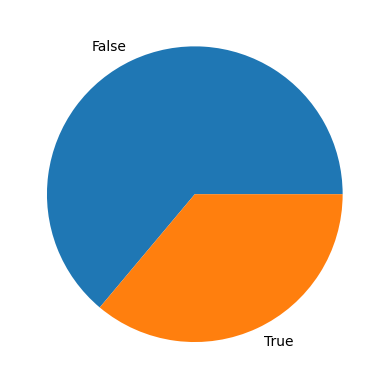

In [25]:
dataset['Outcome'].value_counts().plot.pie()

In [26]:
dataset.groupby('PreviousHeartAttack')['Outcome'].mean() # Se percentuale grande può causare leakage

PreviousHeartAttack
False    0.306682
True     0.481875
Name: Outcome, dtype: float64

In [27]:
y = dataset['Outcome']
x = dataset.drop(columns=['Outcome'])
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=1/3, random_state=42)

In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Features e target
X = df.drop('Outcome', axis=1)
y = df['Outcome'].astype(int)   # per sicurezza

# -------------------------------
# Definizione dei tipi di colonne
# -------------------------------
numeric_features    = ['Age', 'BloodPressure']
binary_features     = ['Smoker', 'Hypertension', 'Diabetes', 'Obesity',
                       'PhysicalActivity', 'HealthyDiet', 'AlcoholConsumption',
                       'FamilyHistory', 'PreviousHeartAttack']
categorical_features = ['Gender', 'Cholesterol', 'StressLevel', 'IncomeLevel']

# -------------------------------
# Preprocessing pipeline
# -------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features),
        ('bin', 'passthrough', binary_features)   # già 0/1
    ])

# Split stratificato
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    stratify=y,
    random_state=42
)

# Applicazione preprocessing
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

Age                       int16
Gender                 category
Smoker                     bool
Hypertension               bool
Diabetes                   bool
Obesity                    bool
Cholesterol                 str
PhysicalActivity           bool
HealthyDiet                bool
StressLevel                 str
AlcoholConsumption         bool
FamilyHistory              bool
IncomeLevel                 str
BloodPressure             int16
PreviousHeartAttack        bool
Outcome                    bool
dtype: object